# ***The Great Giochini***

Import useful libraries

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep
import scipy
import seaborn as sns

Path (select yours, comment others)

In [5]:
#path = "C:/Users/markh/Desktop/Università/Healthcare Data/SL4HD/Train2/"
#path = "C:/Users/giuli/OneDrive/Desktop/SL4HD/Train2/"
path = "C:/Users/hp/OneDrive - Politecnico di Milano/Università/STATISTICAL_LEARNING_FOR_HEALTHCAREDATA/SL4HD/Train2/"

Create files list and dataframe

In [6]:
all_files = glob.glob(path + "*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, names = ["x","y","z","t"])
    li.append(df)

### **Polynomial interpolation of time series**

Let's plot a single time series

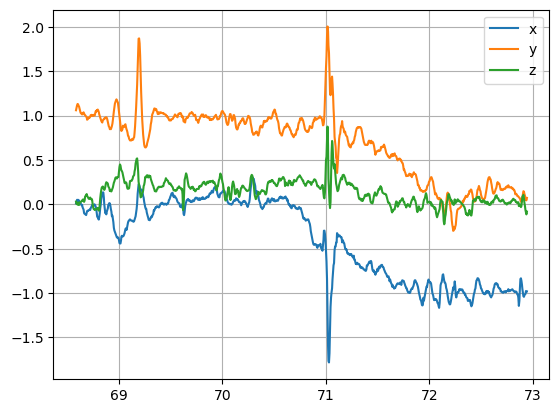

In [7]:
test=101

df = li[test]

x = np.asarray(df.x)
y = np.asarray(df.y)
z = np.asarray(df.z)
t = np.asarray(df.t)

plt.plot(t,x,label='x')
plt.plot(t,y,label='y')
plt.plot(t,z,label='z')

plt.grid()
plt.legend()
plt.show()

This is the polynomial interpolation

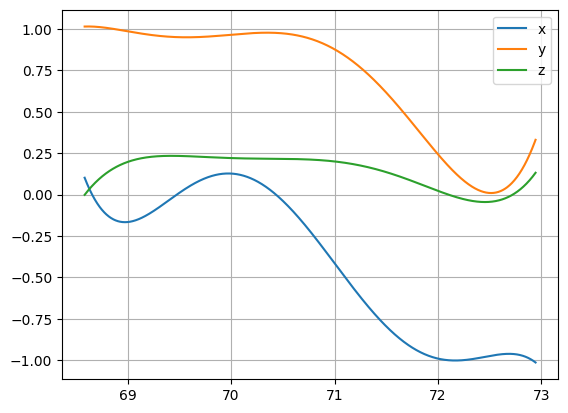

In [104]:
coef_x = np.polyfit(t,x,deg=5,full=False)
poly_x = np.poly1d(coef_x)
plt.plot(t,poly_x(t),label="x")

coef_y = np.polyfit(t,y,deg=5,full=False)
poly_y = np.poly1d(coef_y)
plt.plot(t,poly_y(t),label="y")

coef_z = np.polyfit(t,z,deg=5,full=False)
poly_z = np.poly1d(coef_z)
plt.plot(t,poly_z(t),label="z")

plt.grid()
plt.legend()
plt.show()

Now, we do this for all the time series

In [105]:
def extrapolate(ls,k):

    #########################################################
    ## INPUT:                                              ##
    ## - ls: list of .csv tables each made of measurements ##
    ##       along space axes x, y, z over time t          ##
    ## - k: degree of the polynomial fit                   ##
    ##                                                     ##
    ## OUTPUT:                                             ##
    ## - df: dataframe with original tables as rows and    ##
    ##       coefficients of the polynomial fit along x, y ##
    ##       and z as columns                              ##
    #########################################################

    # Create columns of the output dataset
    columns = []
    for prefix in ['x', 'y', 'z']:
        for i in range(0, k+1):
            columns.append(f"{prefix}_{i}")
    df = pd.DataFrame(columns=columns)

    # Loop over all the .csv tables
    for i in np.arange(len(ls)): #da cambiare con len(ls)

        # Get values from every table
        x = np.asarray(ls[i].x)
        y = np.asarray(ls[i].y)
        z = np.asarray(ls[i].z)
        t = np.asarray(ls[i].t)

        # Get coefficients of the polynomial fit of order k of x, y, z
        coef_x = np.polyfit(t,x,deg=k,full=False)
        coef_y = np.polyfit(t,y,deg=k,full=False)
        coef_z = np.polyfit(t,z,deg=k,full=False)
        
        # Add coefficients to the final dataset
        row = []
        for j in np.arange(k+1):
            row.append(coef_x[j])
        for j in np.arange(k+1):
            row.append(coef_y[j])
        for j in np.arange(k+1):
            row.append(coef_z[j])
        df.loc[i] = row

    return df


df = extrapolate(li,5)
df

,x_0,x_1,x_2,x_3,x_4,x_5,y_0,y_1,y_2,y_3,y_4,y_5,z_0,z_1,z_2,z_3,z_4,z_5
0,-0.001146,0.287879,-28.910970,1450.618067,-3.636437e+04,3.643490e+05,-0.000810,0.201414,-20.035357,995.988873,-2.474333e+04,2.457522e+05,0.001417,-0.354840,35.534622,-1778.265993,4.446966e+04,-4.445691e+05
1,-0.000432,0.082809,-6.330716,241.462039,-4.594694e+03,3.489477e+04,0.000022,-0.004424,0.357892,-14.368129,2.864671e+02,-2.269506e+03,-0.000114,0.022736,-1.809435,71.699760,-1.415041e+03,1.112998e+04
2,-0.000766,0.147851,-11.403342,439.024895,-8.437030e+03,6.474689e+04,-0.000108,0.020381,-1.542750,58.308355,-1.100279e+03,8.293211e+03,0.000189,-0.034726,2.540693,-92.739007,1.688510e+03,-1.226523e+04
3,0.000183,-0.047307,4.893294,-252.534453,6.502099e+03,-6.681241e+04,-0.000768,0.205244,-21.924402,1170.311849,-3.121703e+04,3.328807e+05,0.000009,-0.002020,0.161113,-5.617914,6.864012e+01,1.522219e+02
4,0.000450,-0.135160,16.236132,-974.352580,2.921121e+04,-3.500058e+05,0.000116,-0.034483,4.092491,-242.677213,7.190049e+03,-8.515082e+04,-0.000874,0.261147,-31.186704,1860.752960,-5.546818e+04,6.608864e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,0.001570,-0.961964,235.697917,-28869.186461,1.767645e+06,-4.328401e+07,0.001719,-1.052964,257.970918,-31594.353624,1.934325e+06,-4.736098e+07,0.000351,-0.215160,52.754730,-6466.490470,3.962622e+05,-9.711660e+06
464,-0.012173,5.814655,-1110.857257,106096.606232,-5.065865e+06,9.673966e+07,0.012264,-5.858689,1119.305034,-106905.483526,5.104521e+06,-9.747730e+07,-0.004106,1.963432,-375.502619,35902.116346,-1.716078e+06,3.280606e+07
465,-0.016887,8.239304,-1607.808293,156853.665742,-7.650181e+06,1.492297e+08,0.017134,-8.363987,1632.945973,-159384.306498,7.777404e+06,-1.517851e+08,-0.005465,2.664006,-519.419625,50630.894543,-2.467328e+06,4.808863e+07
466,-0.000509,0.272884,-58.470795,6263.069040,-3.353694e+05,7.181879e+06,0.000386,-0.210351,45.864231,-4996.051117,2.719012e+05,-5.914597e+06,0.000203,-0.111712,24.595438,-2703.830201,1.484235e+05,-3.254917e+06


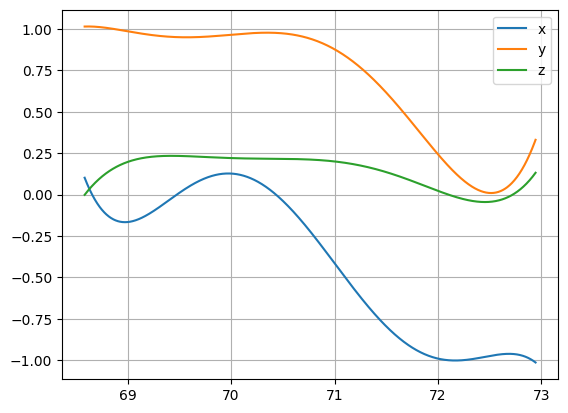

In [106]:
coef_x = df.iloc[test,:6]
poly_x = np.poly1d(coef_x)
plt.plot(t,poly_x(t),label="x")

coef_y = df.iloc[test,6:12]
poly_y = np.poly1d(coef_y)
plt.plot(t,poly_y(t),label="y")

coef_z = df.iloc[test,12:]
poly_z = np.poly1d(coef_z)
plt.plot(t,poly_z(t),label="z")

plt.grid()
plt.legend()
plt.show()

### **Splines**

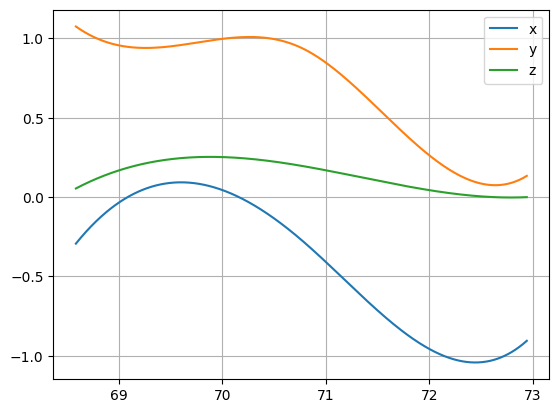

array([-0.29331255,  0.29635721, -0.02506279, -1.32708014, -0.90581044,
        0.        ,  0.        ,  0.        ,  0.        ])

In [107]:
tck_x = splrep(t,x,s=25)
spline_x = splev(t,tck_x)

tck_y = splrep(t,y,s=25)
spline_y = splev(t,tck_y)

tck_z = splrep(t,z,s=25)
spline_z = splev(t,tck_z)

plt.plot(t,spline_x,label='x')
plt.plot(t,spline_y,label='y')
plt.plot(t,spline_z,label='z')

plt.grid()
plt.legend()
plt.show()

tck_x[1]


### **Length**

In [108]:
def extrapolen(ls):

    # Create columns of the output dataset
    columns = ['len']
    df = pd.DataFrame(columns=columns)

    # Loop over all the .csv tables
    for i in np.arange(len(ls)): #da cambiare con len(ls)
        t = np.asarray(ls[i].t)
        row = len(t)
        df.loc[i] = row
    return df


dflen = extrapolen(li)
dflen

,len
0,1336
1,1674
2,1518
3,1457
4,1838
...,...
463,1838
464,1194
465,1160
466,1805


<Axes: >

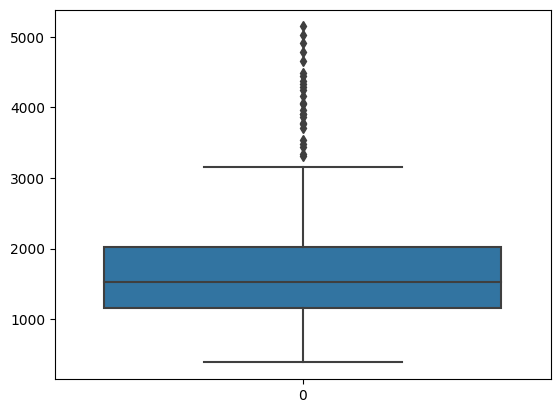

In [109]:
sns.boxplot(dflen.len)

(array([ 35., 148., 122.,  78.,  52.,   7.,   6.,   9.,   7.,   4.]),
 array([ 388. ,  863.8, 1339.6, 1815.4, 2291.2, 2767. , 3242.8, 3718.6,
        4194.4, 4670.2, 5146. ]),
 <BarContainer object of 10 artists>)

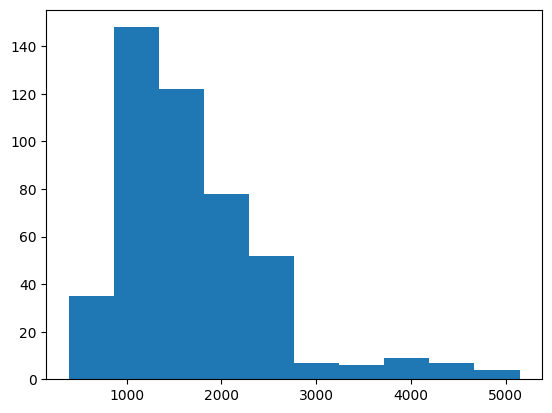

In [110]:
plt.hist(dflen.len)

In [111]:
dfc = pd.read_csv('classes.csv')
dfc

dflc = pd.concat([dflen,dfc],axis=1)
dflc

,len,code,class
0,1336,MR,1
1,1674,MR,1
2,1518,MR,1
3,1457,MR,1
4,1838,MR,1
...,...,...,...
463,1838,FB,2
464,1194,FF,2
465,1160,FF,2
466,1805,FS,2


<Axes: xlabel='class', ylabel='len'>

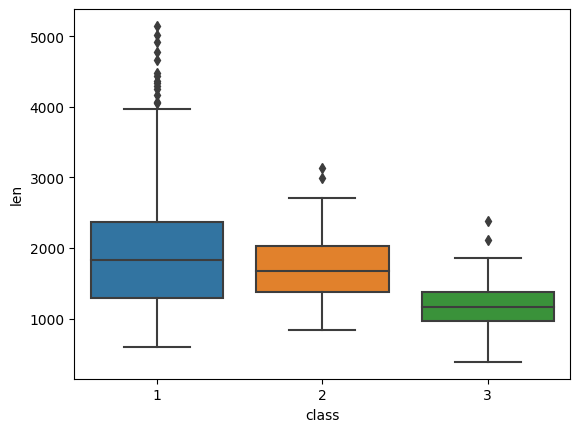

In [112]:
sns.boxplot(x='class',y='len', data=dflc)

### **Parameter Selection**

#### Means

In [113]:
means_x = []
means_y = []
means_z = []

for i in np.arange(len(li)):
    means_x.append(li[i].x.mean())
    means_y.append(li[i].y.mean())
    means_z.append(li[i].z.mean())

<Axes: xlabel='class'>

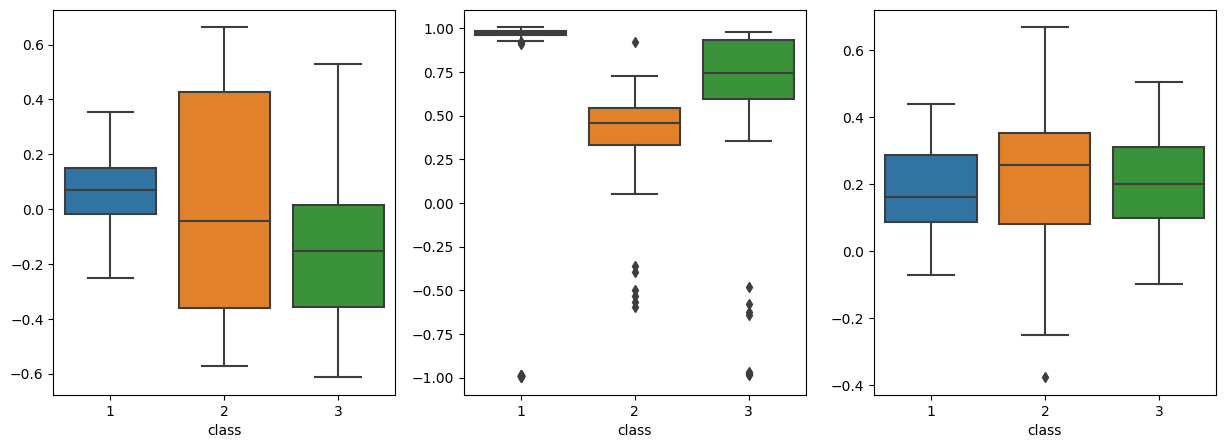

In [132]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=means_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=means_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=means_z,data=dfc,ax=axs[2])

##### Variances

In [117]:
vars_x = []
vars_y = []
vars_z = []

for i in np.arange(len(li)):
    vars_x.append(li[i].x.var())
    vars_y.append(li[i].y.var())
    vars_z.append(li[i].z.var())

<Axes: xlabel='class'>

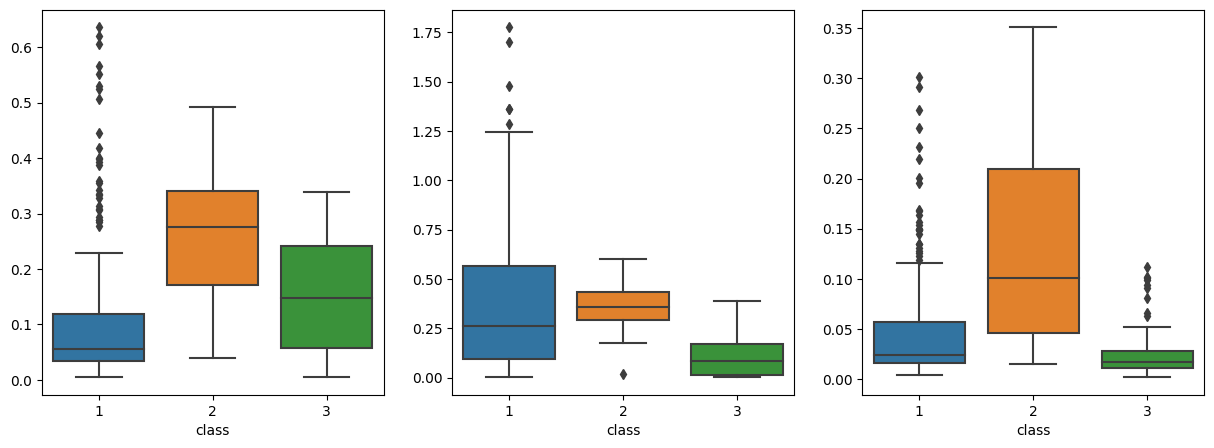

In [133]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=vars_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=vars_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=vars_z,data=dfc,ax=axs[2])

#### Max - Min & argMax - argMin

In [121]:
delta_x = []
deltarg_x = []
delta_y = []
deltarg_y = []
delta_z = []
deltarg_z = []

for i in np.arange(len(df)):

    t = np.asarray(li[i].t)

    coef_x = df.iloc[i,:6]
    poly_x = np.poly1d(coef_x)
    delta_x.append(np.max(poly_x(t))-np.min(poly_x(t)))
    deltarg_x.append(t[np.argmax(poly_x(t))]-t[np.argmin(poly_x(t))])

    coef_y = df.iloc[i,6:12]
    poly_y = np.poly1d(coef_y)
    delta_y.append(np.max(poly_y(t))-np.min(poly_y(t)))
    deltarg_y.append(t[np.argmax(poly_y(t))]-t[np.argmin(poly_y(t))])

    coef_z = df.iloc[i,12:]
    poly_z = np.poly1d(coef_z)
    delta_z.append(np.max(poly_z(t))-np.min(poly_z(t)))
    deltarg_z.append(t[np.argmax(poly_z(t))]-t[np.argmin(poly_z(t))])


<Axes: xlabel='class'>

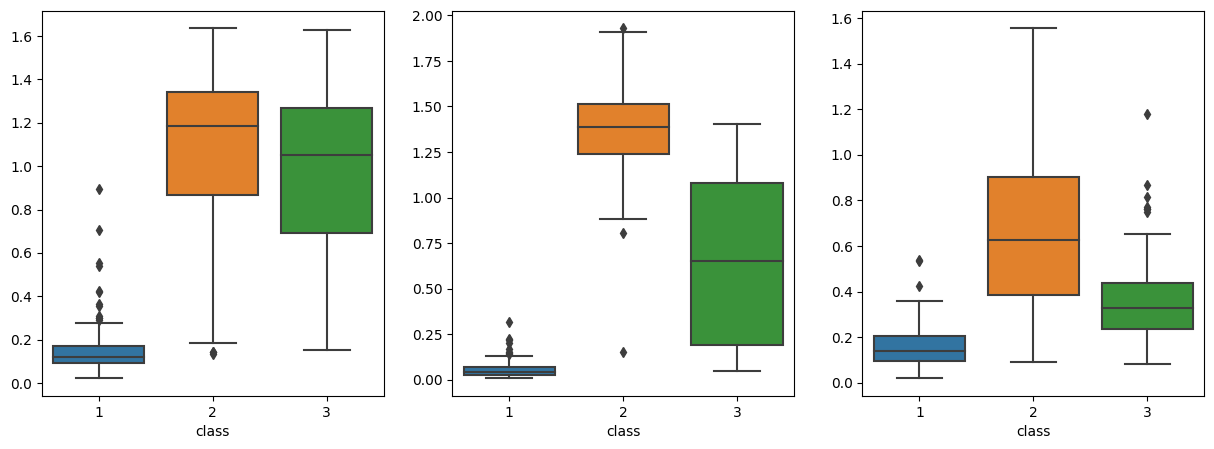

In [134]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=delta_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=delta_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=delta_z,data=dfc,ax=axs[2])

<Axes: xlabel='class'>

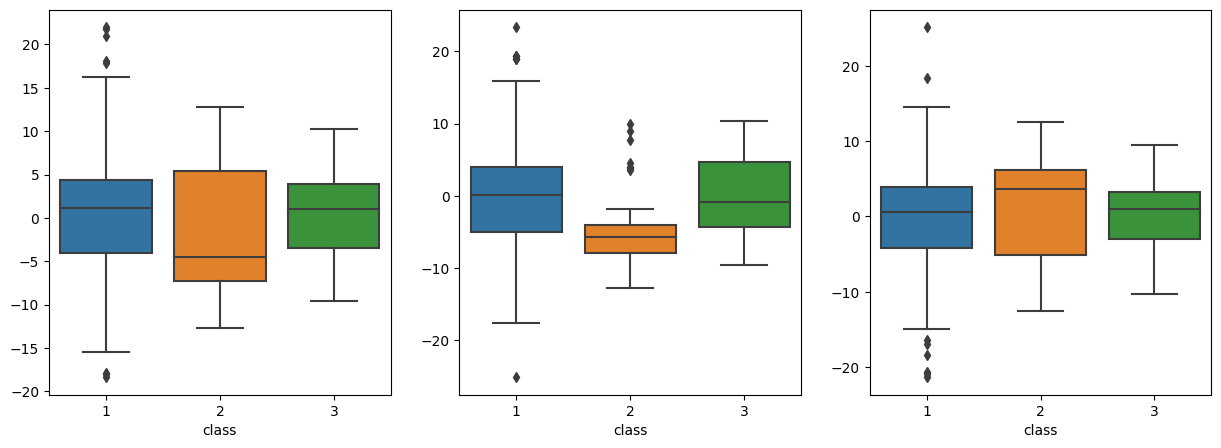

In [135]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=deltarg_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=deltarg_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=deltarg_z,data=dfc,ax=axs[2])